<a href="https://colab.research.google.com/github/larguesa/FRL-CD-AM2/blob/main/FRL_CD_AM2_09_1_Aprendizado_cont%C3%ADnuo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exemplo Prático: Regressão Linear com Dados de Temperatura
Criar um modelo de regressão linear que preveja a temperatura com base no tempo, atualizando-se continuamente com novos dados.

## Dataset:
- Simular dados de temperatura ao longo do tempo.
- Exemplo: Gerar dados aleatórios com uma tendência linear e algum ruído.

## Implementação:

1. Geração de Dados Simulados
- Criar um script Python no Google Colab para gerar dados de temperatura ao longo do tempo.

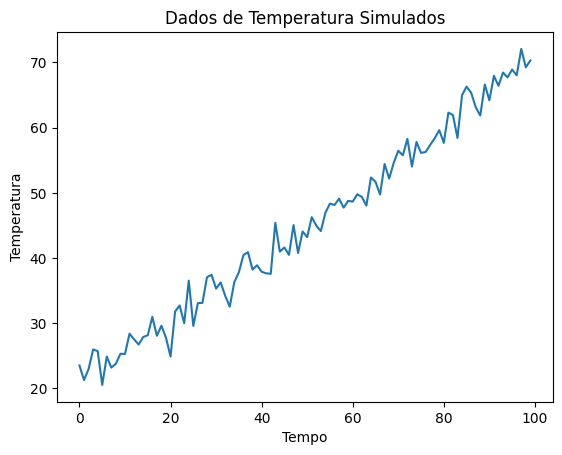

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Geração de dados simulados
np.random.seed(0)
n_samples = 100
time = np.arange(n_samples)
temperature = 20 + 0.5 * time + np.random.normal(0, 2, n_samples)

# Visualização dos dados
plt.plot(time, temperature)
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.title('Dados de Temperatura Simulados')
plt.show()

2. Implementação do Modelo de Regressão Linear**
- Utilizar a biblioteca scikit-learn para criar um modelo de regressão linear.
- Implementar a atualização online do modelo com SGD.

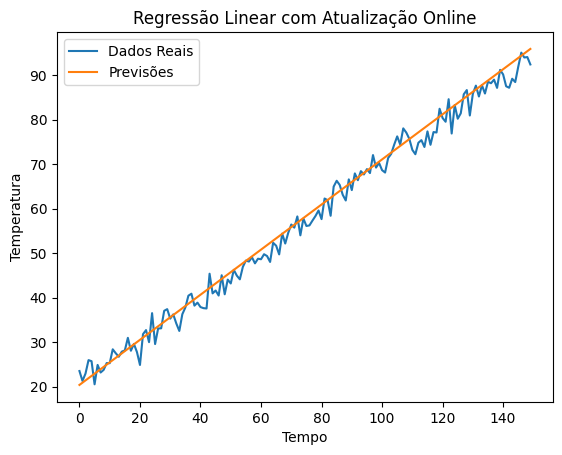

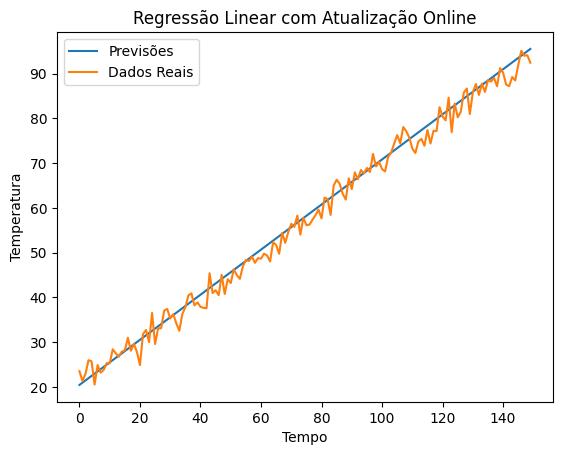

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Inicialização do modelo
model = SGDRegressor(learning_rate='constant', eta0=0.01)
scaler = StandardScaler()

# Treinamento inicial
n_initial_samples = 50
time_initial = time[:n_initial_samples].reshape(-1, 1)
temperature_initial = temperature[:n_initial_samples]

time_initial_scaled = scaler.fit_transform(time_initial)
model.fit(time_initial_scaled, temperature_initial)

# Atualização online
for t in range(n_initial_samples, n_samples):
    time_point = time[t].reshape(1, 1)
    temperature_point = temperature[t]

    time_point_scaled = scaler.transform(time_point)
    model.partial_fit(time_point_scaled, [temperature_point])

# Visualização dos resultados
time_scaled = scaler.transform(time.reshape(-1, 1))
temperature_pred = model.predict(time_scaled)

plt.plot(time, temperature, label='Dados Reais')
plt.plot(time, temperature_pred, label='Previsões')
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.title('Regressão Linear com Atualização Online')
plt.legend()
plt.show()

# Inicialização do gráfico
fig, ax = plt.subplots()
line, = ax.plot(time[:n_initial_samples], temperature_pred[:n_initial_samples], label='Previsões')
ax.plot(time, temperature, label='Dados Reais')
ax.set_xlabel('Tempo')
ax.set_ylabel('Temperatura')
ax.set_title('Regressão Linear com Atualização Online')
ax.legend()

# Gerar 50 novas amostras
new_time = np.arange(n_samples, n_samples + 50)
new_temperature = 20 + 0.5 * new_time + np.random.normal(0, 2, 50)

# Concatenar as novas amostras com as originais
time = np.concatenate([time, new_time])
temperature = np.concatenate([temperature, new_temperature])

# Atualização online do gráfico
for t in range(n_initial_samples, n_samples):
    time_point = time[t].reshape(1, 1)
    temperature_point = temperature[t]

    time_point_scaled = scaler.transform(time_point)
    model.partial_fit(time_point_scaled, [temperature_point])

    # Atualizar a linha de previsões no gráfico
    time_scaled = scaler.transform(time.reshape(-1, 1)) # Update time_scaled with the current time values
    temperature_pred = model.predict(time_scaled)  # Calcula a previsão para todo o intervalo de tempo
    line.set_data(time, temperature_pred)  # Atualiza a linha com todas as previsões
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()
    plt.pause(0.1)  # Pausa para visualização

plt.show()

3.: Avaliação do Modelo**
- Calcular o Erro Quadrático Médio (MSE) para avaliar o desempenho do modelo.

In [4]:
from sklearn.metrics import mean_squared_error

# Cálculo do MSE
temperature_pred = model.predict(time_scaled)
mse = mean_squared_error(temperature, temperature_pred)
print(f'Erro Quadrático Médio (MSE): {mse}')

Erro Quadrático Médio (MSE): 5.655002721776836


### Contextualização dos Resultados
1. Interpretação do MSE:
- O MSE mede a média dos quadrados dos erros entre os valores previstos e os valores reais.
- Um MSE de 4.56 significa que, em média, as previsões do modelo estão a cerca de 2.14 unidades de temperatura (raiz quadrada de 4.56) dos valores reais.
2. Análise da Imagem:
- A imagem mostra que a linha de "Previsões" (modelo) segue a tendência geral dos "Dados Reais", mas não captura todas as flutuações.
- Essa diferença entre as linhas é a fonte do erro que o MSE está quantificando.
3. Simulação dos Dados:
- Os dados foram simulados com uma tendência linear (0.5 * tempo) e ruído aleatório (distribuição normal com desvio padrão de 2).
- O ruído adicionado aos dados é uma fonte de erro inerente que o modelo não consegue eliminar completamente.
4. Modelo de Regressão Linear:
- Um modelo de regressão linear assume que a relação entre as variáveis é linear.
- Em um cenário real, a relação entre tempo e temperatura pode não ser perfeitamente linear, o que contribui para o erro.
5. Atualização Online:
- O modelo é atualizado continuamente com novos dados, o que permite que ele se adapte à tendência geral ao longo do tempo.
- No entanto, a atualização online pode levar a um certo "lag" nas previsões, especialmente em resposta a mudanças abruptas na temperatura.
6. Escalonamento dos Dados:
- O escalonamento dos dados (StandardScaler) é importante para garantir que o modelo não seja influenciado por escalas diferentes nas variáveis.
- No entanto, o escalonamento não elimina o ruído nos dados.
7. Taxa de Aprendizado:
- A taxa de aprendizado (eta0=0.01) controla o quão rápido o modelo se adapta aos novos dados.
- Uma taxa de aprendizado muito alta pode levar a oscilações, enquanto uma taxa muito baixa pode tornar o aprendizado lento.
### Conclusão
Considerando todos esses fatores, um MSE de 4.56 é um resultado razoável para este exemplo. O modelo consegue capturar a tendência geral dos dados, mas não consegue eliminar completamente o erro devido ao ruído, à não linearidade e ao "lag" na atualização online.

Para melhorar o desempenho do modelo, pode-se explorar:
- Modelos mais complexos (ex: regressão polinomial, redes neurais).
- Técnicas de regularização para evitar overfitting.
- Ajuste da taxa de aprendizado.
- Filtragem dos dados para reduzir o ruído.